In [1]:
!pip install pmdarima
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.6 MB/s eta 0:00:00


In [82]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import itertools
import pmdarima
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score

In [57]:
#データの読み込み
df = pd.read_csv('stock_price.csv',parse_dates=True)
df=df.iloc[::-1]
df.reset_index(inplace=True,drop=True)
df

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25
1,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43
2,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74
3,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93
4,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82
...,...,...,...,...,...,...,...
9197,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13
9198,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14
9199,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63
9200,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07


In [58]:
df=df[["日付け","終値"]]
df.set_index(keys="日付け",inplace=True)
df

,終値
日付け,
1987-02-12,182.4
1987-02-13,172.5
1987-02-16,175.5
1987-02-17,182.4
1987-02-18,191.2
...,...
2024-07-26,157.9
2024-07-29,159.7
2024-07-30,158.7


In [70]:
data = df.filter(['終値'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
data_std = scaler.fit_transform(dataset)
data_std

array([[0.54745328],
       [0.51117626],
       [0.52216929],
       ...,
       [0.46060828],
       [0.46683767],
       [0.45181385]])

In [71]:
train=data_std[:int(len(data_std)*0.8)]
test=data_std[int(len(data_std)*0.8):]

In [72]:
x_train=[]
for i in range(len(train)-40):
  x_train.append(train[i:i+40])
y_train=train[40:]
print(len(x_train))
print(len(y_train))

7321
7321


In [75]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [76]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - loss: 0.0068
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.0012
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 9.3977e-04
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 7.9527e-04
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 6.9363e-04
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - loss: 8.1777e-04
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 6.8961e-04
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 5.9722e-04
Epoch 9/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 6.7501e-04
Epoch 10/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 5.6876e-04
Epoch 11/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 5.4173e-04
Epoch 12/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 6.8685e-04
Epoch 13/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 5.2681e-04
Epoch 14/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/ste

In [78]:
x_test=[]
for i in range(len(test)-40):
  x_test.append(test[i:i+40])
y_test=test[40:]

In [79]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [80]:
pred = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [83]:
r2 = r2_score(y_test, pred)
print(r2)

0.9736145865405306


In [85]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test, pred, squared=False)
print(rmsle)

0.012156661676095954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:675: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


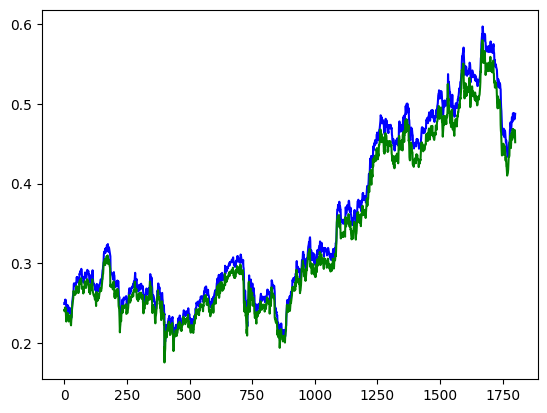

In [88]:
plt.plot(pred,"b")
plt.plot(y_test,"g")
plt.show()

In [93]:
correct=0
incorrect=0
for i in range(len(y_test)-1):
  if (y_test[i+1]-y_test[i])*(pred[i+1]-y_test[i])>0:
    correct+=1
  else:
    incorrect+=1
print(correct)
print(incorrect)

879
921
